# Scipy Survey

[Scipy](http://www.scipy.org/) is built on top of `numpy` and provides extended functionality to support mathematic, scientific and engineering programming applications.   The library or package has a lot of different things in it and you may never need certain sub-packages, it all depends on your work.   The sub-packages in no particular order are:

- [scipy.constant](http://docs.scipy.org/doc/scipy/reference/constants.html) - scientific constants
- [scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html) - special functions, Airy, Bessel, Elliptic, Gamma, ...
- [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html) - numerical integration
- [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html) - minimization routines
- [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html)
- [scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html) - FFT, IFFT
- [scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html) - filtering, convolution, filter definition
- [scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html) - linear algebra
- [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) - continuous and discrete distribution functions, kurtosis, skew, ...
- [scipy.io](http://docs.scipy.org/doc/scipy/reference/tutorial/io.html) - input/output utilities


In [13]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

# plot all graphs inline
%matplotlib inline    

print("Scipy version: {}".format(sp.__version__))

Scipy version: 1.3.0


In [14]:
def plot2compare(a, b, labels=None, relative=False):
    """ Plots two data sets and their differences

    :param a: first data set (displayed as black dots)
    :param b: second data set (displayed as red circles)

    .. seealso:
      * :py:func:`matplotlib.pyplot.plot`
      * :py:func:`matplotlib.pyplot.subplot`

    """
    import matplotlib.pyplot as plt

    if labels:
        label_a, label_b = labels
    else:
        label_a, label_b = 'A', 'B'

    plt.figure()

    ax1 = plt.subplot(211)
    plt.plot(a, '.-k', label=label_a)
    plt.plot(b, 'or', fillstyle='none', label=label_b)
    plt.grid()
    plt.legend()

    plt.subplot(212, sharex=ax1)
    if relative:
        plt.plot((b - a)*100/a, 'ok', label='Relative Difference')
        plt.ylabel("Percent")
    else:
        plt.plot(b - a, 'ok', label='Absolute Difference')
    plt.legend()
    plt.grid()
    plt.show()

## Input/Output

In [15]:
# Primarily useful for loading MATLAB data and saving to MATLAB files
import scipy.io as sio

In [16]:
matlab_data = sio.loadmat('data/from_waveform_1')

In [17]:
matlab_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 't', 'x', 'RR', 'RR_tm', 'raw_rr', 'raw_rr_tm', 'goodness'])

In [18]:
Fs = matlab_data['Fs']
Fs

array([[16]], dtype=uint8)

In [19]:
Fs[0][0]

16

In [20]:
x = matlab_data['x']
x

array([[-1.0710295 ],
       [ 0.38290271],
       [ 0.14407628],
       ...,
       [-1.43495636],
       [-1.11206127],
       [-1.59906774]])

In [21]:
x.flatten()  # remove N X 1 structure

array([-1.0710295 ,  0.38290271,  0.14407628, ..., -1.43495636,
       -1.11206127, -1.59906774])

In [ ]:
x.T[0]       # same thing, just a different way

## Filtering

### FIR Filter

In [22]:
from scipy.signal import firwin, lfilter, filtfilt

fs = 5
x= 2*np.pi*np.linspace(0, 1, 1000)*fs
data = np.sin(x) 
data += 0.05*np.random.randn(len(data))

b = firwin(65, 22*2/125.)

filt_out_1_fir = lfilter(b, [1], data)
filt_out_2_fir = filtfilt(b, [1], data)

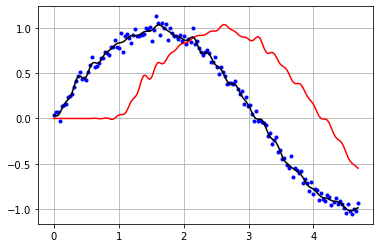

In [23]:
plt.plot(x[:150], data[:150], 'b.', )
plt.plot(x[:150], filt_out_1_fir[:150], 'r-')
plt.plot(x[:150], filt_out_2_fir[:150], 'k-')
plt.grid(True)

### IIR Filter

In [24]:
from scipy.signal import butter

n_order = 5
b_lpf, a_lpf = butter(n_order, 0.1, 'low')

In [25]:
filt_out_1_iir = lfilter(b_lpf, a_lpf, data)
filt_out_2_iir = filtfilt(b_lpf, a_lpf, data)

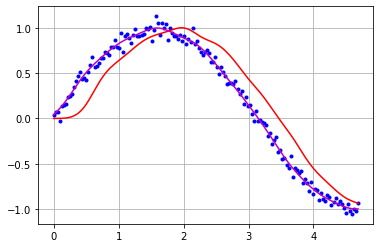

In [26]:
plt.plot(x[:150], data[:150], 'b.', )
plt.plot(x[:150], filt_out_1_iir[:150], 'r-')
plt.plot(x[:150], filt_out_2_iir[:150], 'm-')
plt.grid(True)

## Interpolation

In [32]:
import scipy.interpolate as interpolate


### 1D Interpolation

In [33]:
x = np.arange(10.)
y = x + 0.2*np.random.randn(10)
xnew = np.linspace(0., 9., 100)
x,y

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([-0.13475131,  1.01420469,  1.64340435,  3.04165752,  3.66389976,
         5.25022353,  5.82171513,  7.06943342,  7.93039154,  8.97748292]))

In [34]:
interpolate.interp1d?

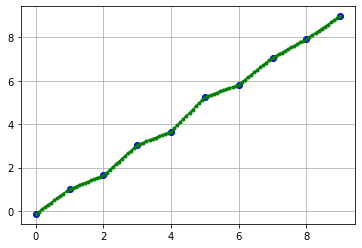

In [35]:
# linear interpolation 
fp = interpolate.interp1d(x, y)
ynew = fp(xnew)

plt.plot(x, y, 'bo', )
plt.plot(xnew, ynew, 'g.-')
plt.grid(True)

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

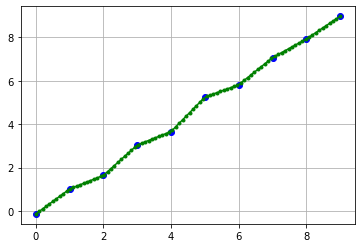

In [36]:
# linear interpolation outside bounds of data
xnew2 =  np.linspace(0., 10., 100)

# ynew = fp(xnew2)  gives error
fp = interpolate.interp1d(x, y, bounds_error=False)
ynew = fp(xnew2)

plt.plot(x, y, 'bo', )
plt.plot(xnew2, ynew, 'g.-')
plt.grid(True)
xnew2

In [ ]:
# nans not plotted but 
ynew[-15:]

### pchip Interpolation

In [ ]:
x=np.arange(-3., 4)
y = np.array([-1, -1, -1, 0, 1, 1, 1])
t=np.arange(-3., 3, 0.1)

# Matlab example of pchip

p = interpolate.pchip_interpolate(x,y,t)
ax = plt.figure()
plt.plot(x,y,'o',t,p,'-')
plt.ylim([-1.5, 1.5])
plt.legend(['data','pchip'], loc='best')
plt.legend

In [ ]:
import os

filename = os.path.join('.', 'data', 'pchip', 'tm.mat')
tm = sio.loadmat(filename)['tm'].flatten()

filename = os.path.join('.', 'data', 'pchip', 'env.mat')
pks = sio.loadmat(filename)['pks'].flatten()

filename = os.path.join('.', 'data', 'pchip', 'tenv.mat')
tenv = sio.loadmat(filename)['tenv'].flatten()

py_pchip = interpolate.pchip_interpolate(tm, pks, tenv)

In [ ]:
plt.plot(tm[:50], pks[:50], 'bo', )
plt.plot(tenv[:600], py_pchip[:600], 'r.-')
plt.grid(True)

## Spectrogram

In [ ]:
import scipy.signal as spsig

file_path = os.path.join('data', 'rr-min-psd.mat')
data_exp = sio.loadmat(file_path)

psd_matlab = data_exp['PS']
rs = data_exp['rs'].flatten()

In [ ]:
# Create spectrogram
freq, tm, psd = spsig.spectrogram(rs, fs=16, window='hamming', nperseg=640,
                                   noverlap=480, nfft=1024, detrend=False)

In [ ]:
plot2compare(psd_matlab[0], psd[0], ['matlab', 'python'])